# Warranty Claim

## Problem Statment: 

When an item is sold, what is the probability that customer would file for warranty and is it a fraudulent claim or not

## Importing Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis (EDA)

In [147]:
df_file = 'train.csv'
warranty = pd.read_csv(df_file )

In [164]:
warranty.head()

,Unnamed: 0,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,...,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
0,7957,North East,Assam,Rural,Guwhati,Personal,Household,AC,0,1,...,0,0,0,4474.0,12,202,Manufacturer,30.0,Claim,0
1,1396,East,Delhi,Urban,New Delhi,Personal,Entertainment,TV,0,0,...,1,1,1,25000.0,13,60,Dealer,1.3,Complaint,0
2,7582,West,Andhra Pradesh,Rural,Hyderabad,Business,Household,AC,0,0,...,0,0,0,10000.0,12,3,Dealer,2.5,Claim,0
3,5824,West,Gujarat,Rural,Ahmedabad,Personal,Entertainment,TV,0,0,...,1,1,0,4216.0,10,672,Dealer,25.0,Other,0
4,4086,South West,Kerala,Rural,Kochi,Business,Household,AC,0,0,...,0,0,0,20000.0,13,3,Manufacturer,6.5,Claim,0


In [62]:
warranty['Service_Centre'].unique()

array([12, 13, 10, 11, 15, 14, 16], dtype=int64)

In [148]:
df_file = 'test_1.csv'
test = pd.read_csv(df_file )

In [149]:
# take a look at dimensions 
print(warranty.shape)
print(test.shape)

(8341, 21)
(3576, 20)


In [167]:
warranty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8341 entries, 0 to 8340
Data columns (total 21 columns):
Unnamed: 0          8341 non-null int64
Region              8341 non-null object
State               8341 non-null object
Area                8341 non-null object
City                8341 non-null object
Consumer_profile    8341 non-null object
Product_category    8341 non-null object
Product_type        8341 non-null object
AC_1001_Issue       8341 non-null int64
AC_1002_Issue       8341 non-null int64
AC_1003_Issue       8341 non-null int64
TV_2001_Issue       8341 non-null int64
TV_2002_Issue       8341 non-null int64
TV_2003_Issue       8341 non-null int64
Claim_Value         8101 non-null float64
Service_Centre      8341 non-null int64
Product_Age         8341 non-null int64
Purchased_from      8341 non-null object
Call_details        8341 non-null float64
Purpose             8341 non-null object
Fraud               8341 non-null int64
dtypes: float64(2), int64(10), object(9)

In [169]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 20 columns):
Unnamed: 0          3576 non-null int64
Region              3576 non-null object
State               3576 non-null object
Area                3576 non-null object
City                3576 non-null object
Consumer_profile    3576 non-null object
Product_category    3576 non-null object
Product_type        3576 non-null object
AC_1001_Issue       3576 non-null int64
AC_1002_Issue       3576 non-null int64
AC_1003_Issue       3576 non-null int64
TV_2001_Issue       3576 non-null int64
TV_2002_Issue       3576 non-null int64
TV_2003_Issue       3576 non-null int64
Claim_Value         3483 non-null float64
Service_Centre      3576 non-null int64
Product_Age         3576 non-null int64
Purchased_from      3576 non-null object
Call_details        3576 non-null float64
Purpose             3576 non-null object
dtypes: float64(2), int64(9), object(9)
memory usage: 558.9+ KB


In [150]:
# drop the unncesseary column
warranty=warranty.drop(['Unnamed: 0'],axis=1)
test = test.drop(['Unnamed: 0'],axis=1)

In [151]:
warranty['Purpose'].mask(warranty['Purpose'] == 'claim', 'Claim', inplace=True)
test['Purpose'].mask(test['Purpose'] == 'claim', 'Claim', inplace=True)

## Missing Data

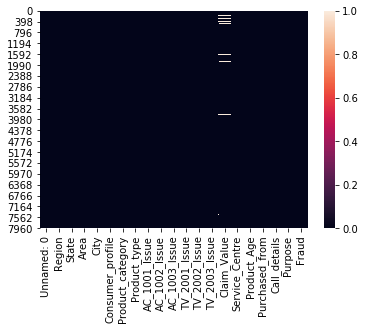

In [316]:
sns.heatmap(warranty.isnull())

In [8]:
warranty.isnull().sum()

Region                0
State                 0
Area                  0
City                  0
Consumer_profile      0
Product_category      0
Product_type          0
AC_1001_Issue         0
AC_1002_Issue         0
AC_1003_Issue         0
TV_2001_Issue         0
TV_2002_Issue         0
TV_2003_Issue         0
Claim_Value         240
Service_Centre        0
Product_Age           0
Purchased_from        0
Call_details          0
Purpose               0
Fraud                 0
dtype: int64

In [9]:
test.isnull().sum()

Region               0
State                0
Area                 0
City                 0
Consumer_profile     0
Product_category     0
Product_type         0
AC_1001_Issue        0
AC_1002_Issue        0
AC_1003_Issue        0
TV_2001_Issue        0
TV_2002_Issue        0
TV_2003_Issue        0
Claim_Value         93
Service_Centre       0
Product_Age          0
Purchased_from       0
Call_details         0
Purpose              0
dtype: int64

In [152]:
warranty.fillna(warranty.Claim_Value.median(),inplace=True)
test.fillna(test.Claim_Value.median(),inplace=True)

In [153]:
warranty.drop_duplicates(keep="first", inplace=True)

In [154]:
numerical_feats = warranty.dtypes[warranty.dtypes != "object"].index
categorical_feats = warranty.dtypes[warranty.dtypes == "object"].index
print("Number of Numerical features: ", len(numerical_feats))
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  11
Number of Categorical features:  9


In [180]:
#warranty.groupby('Product_type').agg({'City': ['min', 'max']})

In [178]:
#warrantyE = pd.DataFrame(warranty, columns = [ 'City','Region']) 
#arrantyE

# Dealing with Outliers

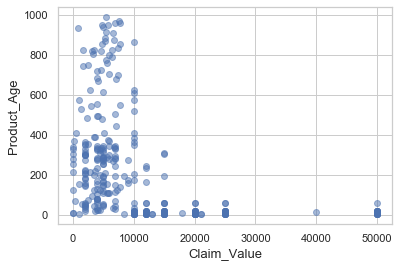

In [179]:
fig, ax = plt.subplots()
ax.scatter(x = warranty['Claim_Value'],y =warranty['Product_Age'] ,alpha=0.5)
plt.xlabel('Claim_Value', fontsize=13)
plt.ylabel('Product_Age', fontsize=13)
plt.show()

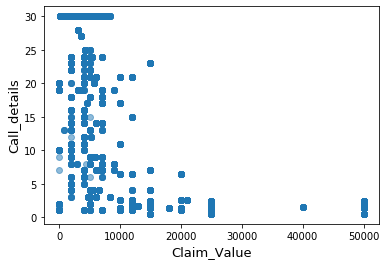

In [7]:
fig, ax = plt.subplots()
ax.scatter(x = warranty['Claim_Value'],y =warranty['Call_details'] ,alpha=0.5)
plt.xlabel('Claim_Value', fontsize=13)
plt.ylabel('Call_details', fontsize=13)
plt.show()

In [6]:
#warranty.groupby(by=[ "Fraud"])['Product_Age'].value_counts().unstack(1).plot.bar()

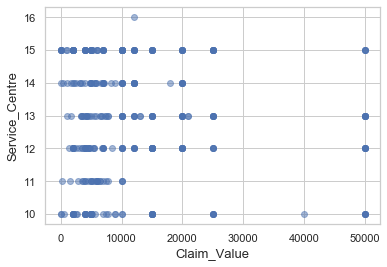

In [183]:
fig, ax = plt.subplots()
ax.scatter(x = warranty['Claim_Value'],y =warranty['Service_Centre'] ,alpha=0.5)
plt.xlabel('Claim_Value', fontsize=13)
plt.ylabel('Service_Centre', fontsize=13)
plt.show()

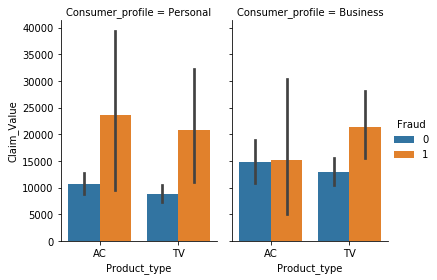

In [15]:
g = sns.catplot(x="Product_type", y="Claim_Value",
                hue="Fraud", col="Consumer_profile",
                data=warranty, kind="bar",
                height=4, aspect=.7);


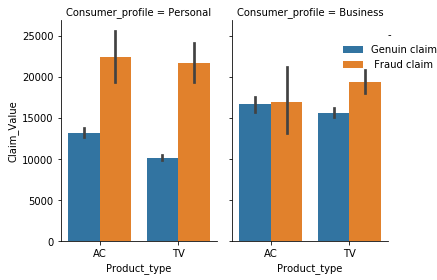

In [130]:
g = sns.catplot(x="Product_type", y="Claim_Value",
                hue="Fraud", col="Consumer_profile",
                data=warranty, kind="bar",
                height=4, aspect=.7 , legend =True);
new_title = '-'
g._legend.set_title(new_title)
# replace labels
new_labels = [ 'Genuin claim',' Fraud claim']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
leg = g._legend
leg.set_bbox_to_anchor([1,0.8])

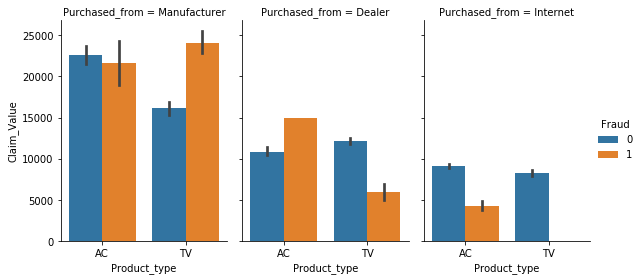

In [131]:
g = sns.catplot(x="Product_type", y="Claim_Value",
                hue="Purpose", col="Purchased_from",
                data=warranty, kind="bar",
                height=4, aspect=.7);

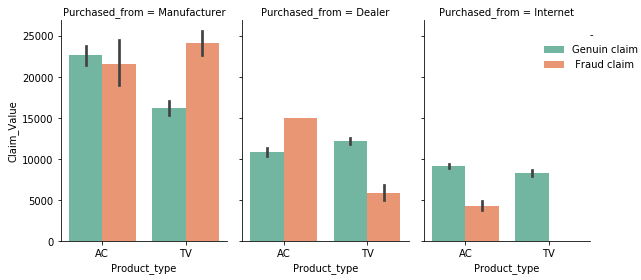

In [138]:
g = sns.catplot(x="Product_type", y="Claim_Value",
                hue="Fraud", col="Purchased_from",
                data=warranty, kind="bar",
                height=4, aspect=.7,palette="Set2");
new_title = '-'
g._legend.set_title(new_title)
# replace labels
new_labels = [ 'Genuin claim',' Fraud claim']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
leg = g._legend
leg.set_bbox_to_anchor([1,0.8])


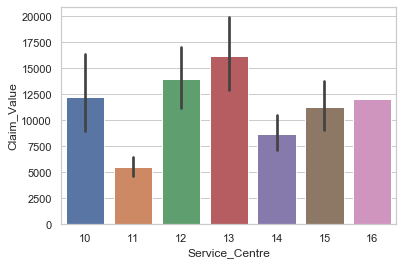

In [18]:
sns.set(style="whitegrid")
#tips = sns.load_dataset("warranty")
ax = sns.barplot(x='Service_Centre',y='Claim_Value', data=warranty)

Text(0.5, 1.0, 'Claim Value distribution')

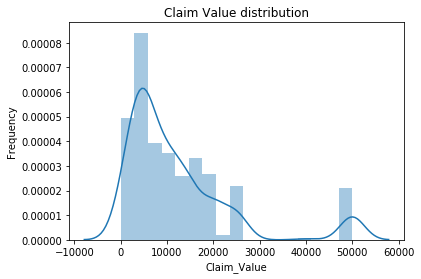

In [13]:
sns.distplot(warranty['Claim_Value'] );
plt.ylabel('Frequency')
plt.title('Claim Value distribution')


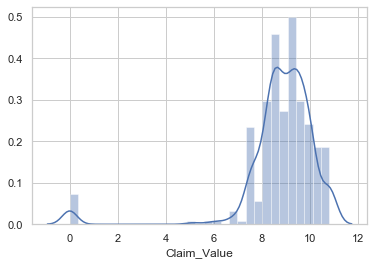

In [20]:
#warranty['Claim_Value'] = np.log1p(warranty['Claim_Value'])

#Check the new distribution 
#sns.distplot(warranty['Claim_Value']);

Text(0.5, 1.0, 'Product Age distribution')

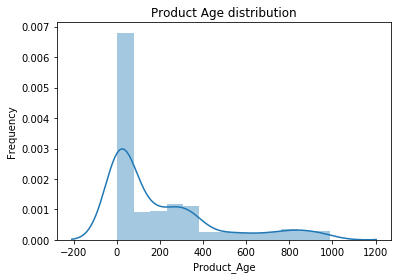

In [14]:
sns.distplot(warranty['Product_Age'] );
plt.ylabel('Frequency')
plt.title('Product Age distribution')


Text(0.5, 1.0, 'Nmber of claims for each State')

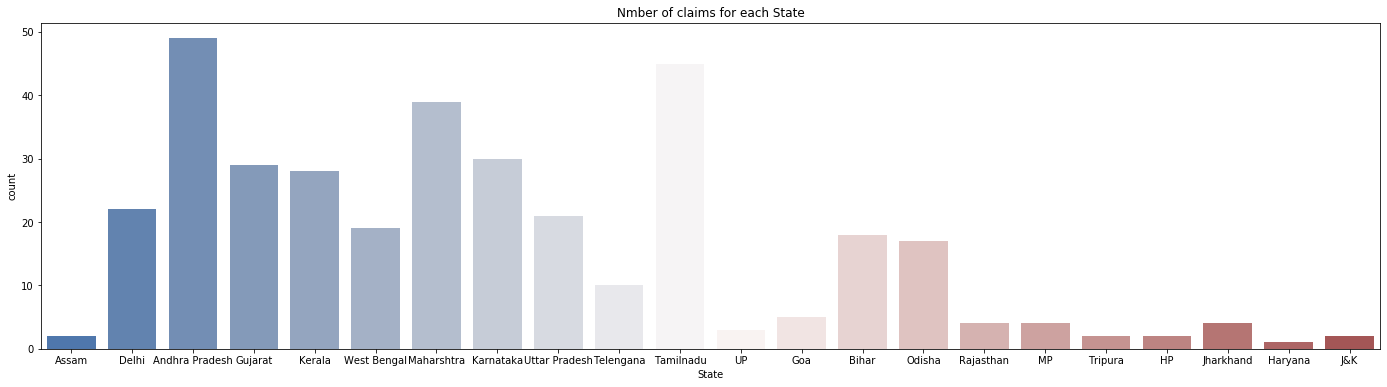

In [29]:
fig = plt.figure(figsize=(24,6))
sns.countplot(x='State', data=warranty,palette="vlag")
plt.title('Nmber of claims for each State')

Text(0.5, 1.0, 'Nmber of claims for each City')

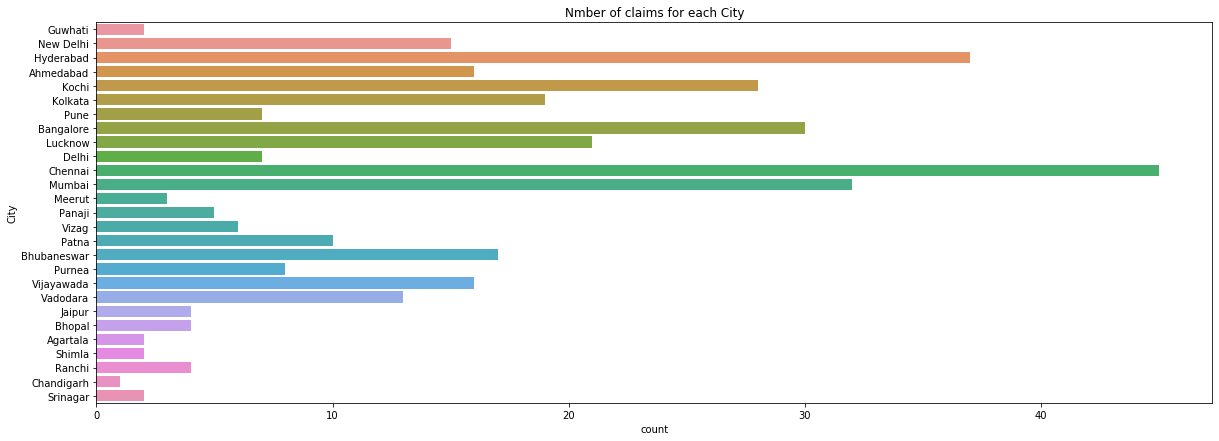

In [30]:
ig = plt.figure(figsize=(20,7))
sns.countplot(y='City', data=warranty)
plt.title('Nmber of claims for each City')

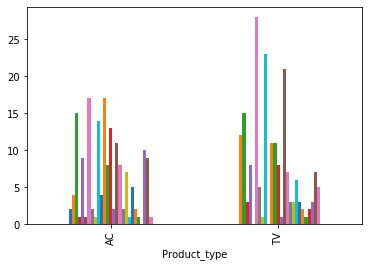

In [32]:
warranty.groupby('City').Product_type.value_counts().unstack(0).plot.bar(legend=False)

Text(0.5, 1.0, 'Nmber of claims for each product')

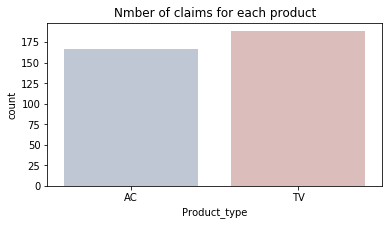

In [10]:
fig = plt.figure(figsize=(6,3))
sns.countplot(x='Product_type', data=warranty, palette="vlag")
plt.title('Nmber of claims for each product')


<Figure size 792x504 with 0 Axes>

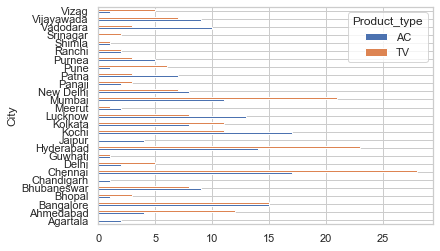

In [22]:
fig = plt.figure(figsize=(11,7))
warranty.groupby('City').Product_type.value_counts().unstack(1).plot.barh()

In [102]:
#Region =warranty.groupby(by=[ "Region"])['City'].count()
#Purpose =warranty.groupby(by=[ "Product_type"])['Purpose'].count()

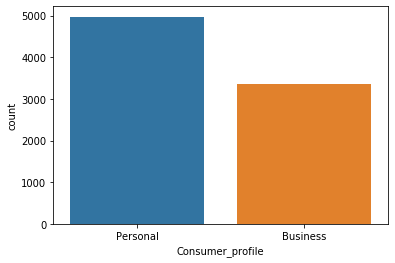

In [146]:
fig = plt.figure(figsize=(6,4))
sns.countplot(x='Consumer_profile', data=warranty)

<Figure size 792x504 with 0 Axes>

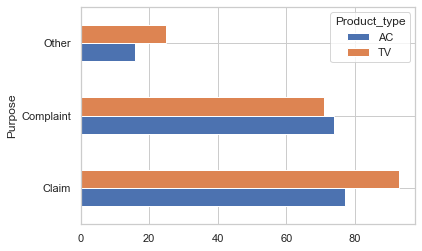

In [23]:
fig = plt.figure(figsize=(11,7))
warranty.groupby('Purpose').Product_type.value_counts().unstack().plot.barh()

<Figure size 792x504 with 0 Axes>

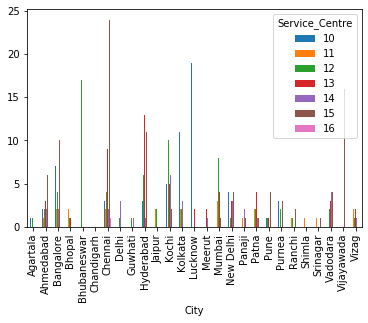

In [50]:
fig = plt.figure(figsize=(11,7))
warranty.groupby('City').Service_Centre.value_counts().unstack().plot.bar()

Text(0.5, 1.0, 'Evaporator Coil ')

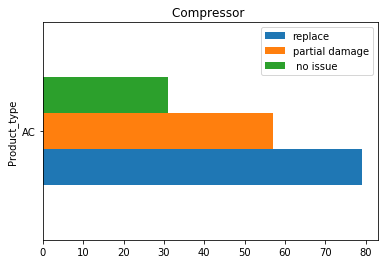

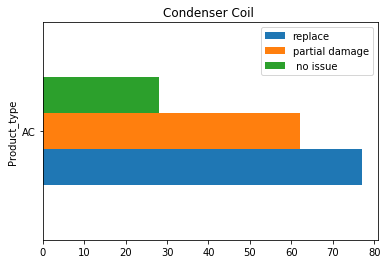

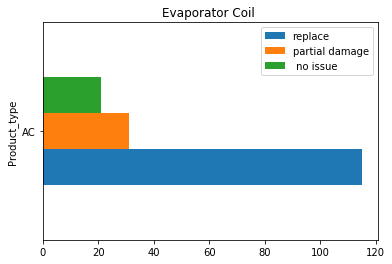

In [47]:
# 0 replace the component,
# 1 partial damage of the component 
# 2 no issue with the component
warranty[warranty['Product_type']=='AC'].groupby(by=["Product_type"])['AC_1001_Issue'].value_counts().unstack(1).plot.barh( ) # Compressor 
plt.legend(["replace", "partial damage",' no issue']);
plt.title('Compressor ')
warranty[warranty['Product_type']=='AC'].groupby(by=["Product_type"])['AC_1002_Issue'].value_counts().unstack(1).plot.barh() # Condenser Coil
plt.legend(["replace", "partial damage",' no issue']);
plt.title('Condenser Coil ')
warranty[warranty['Product_type']=='AC'].groupby(by=["Product_type"])['AC_1003_Issue'].value_counts().unstack(1).plot.barh() # Evaporator Coil
plt.legend(["replace", "partial damage",' no issue']);
plt.title('Evaporator Coil ')

Text(0.5, 1.0, ' Motherboard ')

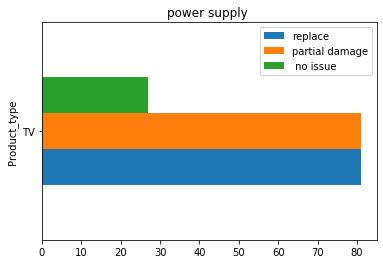

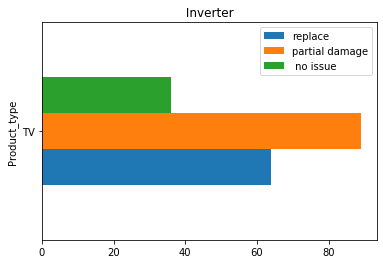

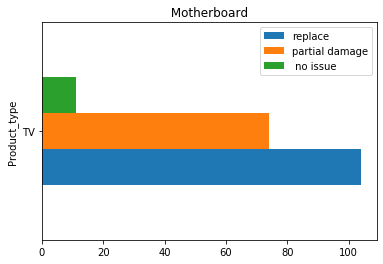

In [48]:
# 0 replace the component,
# 1 partial damage of the component 
# 2 no issue with the component
warranty[warranty['Product_type']=='TV'].groupby(by=["Product_type"])['TV_2001_Issue'].value_counts().unstack(1).plot.barh() # power supply
plt.legend(["replace", "partial damage",' no issue']);
plt.title('power supply ')
warranty[warranty['Product_type']=='TV'].groupby(by=["Product_type"])['TV_2002_Issue'].value_counts().unstack(1).plot.barh() # Inverter 
plt.legend(["replace", "partial damage",' no issue']);
plt.title(' Inverter ')
warranty[warranty['Product_type']=='TV'].groupby(by=["Product_type"])['TV_2003_Issue'].value_counts().unstack(1).plot.barh() # Motherboard
plt.legend(["replace", "partial damage",' no issue']);
plt.title(' Motherboard ')

In [66]:
v = pd.cut(warranty['Claim_Value'], bins=20) 
a =pd.cut(warranty['Product_Age'], bins=10)

Text(0.5, 1.0, 'The amount of warranty claims')

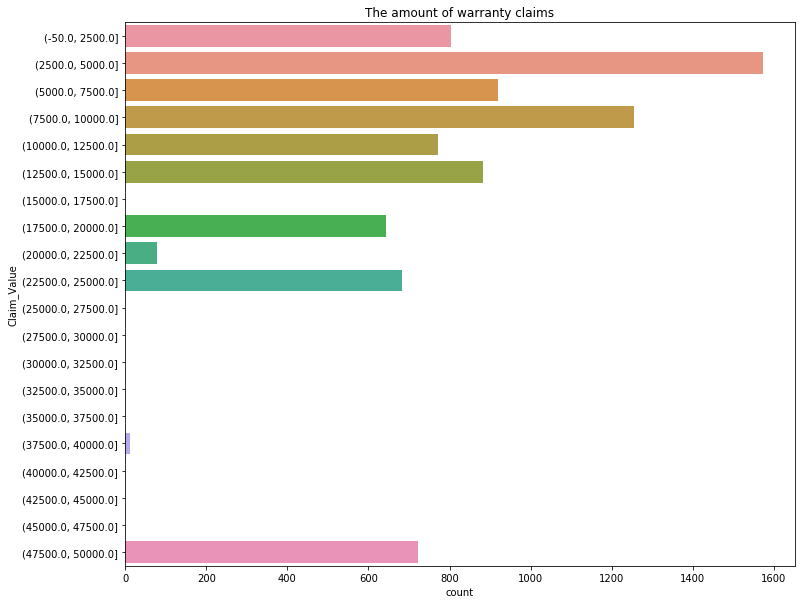

In [68]:
fig = plt.figure(figsize=(12,10))
sns.countplot(y=v, data=warranty)
plt.title('The amount of warranty claims')

Text(0.5, 1.0, 'Product age from date of purchase (Days)')

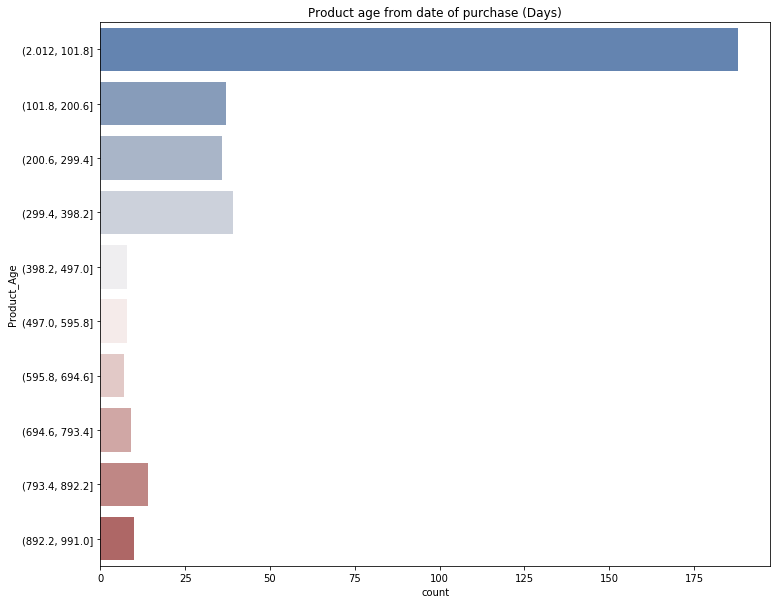

In [15]:
fig = plt.figure(figsize=(12,10))
sns.countplot(y=a, data=warranty,  palette="vlag")
plt.title('Product age from date of purchase (Days)')


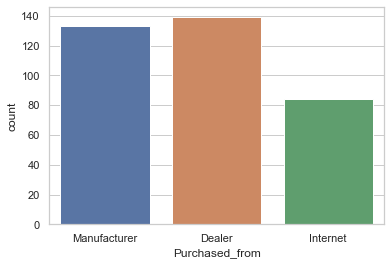

In [50]:
fig = plt.figure(figsize=(6,4))
sns.countplot(x='Purchased_from', data=warranty)

Text(0.5, 1.0, 'Number of claim for each service center ')

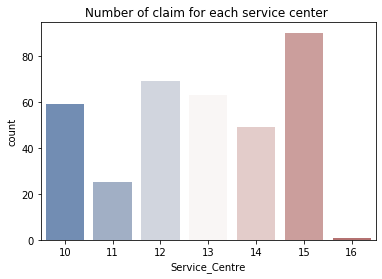

In [57]:
fig = plt.figure(figsize=(6,4))
sns.countplot(x='Service_Centre', data=warranty,palette="vlag")
plt.title('Number of claim for each service center ')

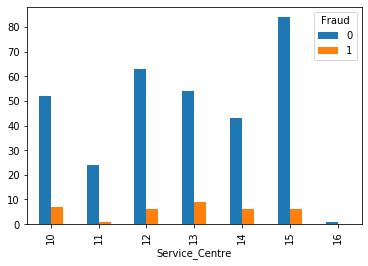

In [35]:
warranty.groupby('Service_Centre').Fraud.value_counts().unstack().plot.bar()


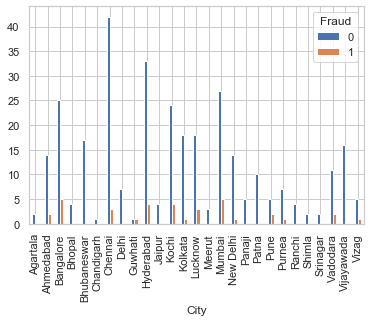

In [61]:
warranty.groupby('City').Fraud.value_counts().unstack().plot.bar()

In [69]:
warrantyF = pd.DataFrame(warranty, columns = warranty.columns) 
warrantyF= warrantyF[warrantyF['Fraud']== 1]
warrantyF.head()

,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
36,East,Karnataka,Urban,Bangalore,Personal,Household,AC,0,0,0,0,0,0,50000.0,13,7,Manufacturer,1.6,Claim,1
42,South West,Maharshtra,Urban,Pune,Business,Entertainment,TV,0,0,0,0,0,0,20000.0,13,16,Manufacturer,2.5,Other,1
85,East,Karnataka,Urban,Bangalore,Personal,Household,AC,0,0,0,0,0,0,50000.0,13,7,Manufacturer,1.6,Claim,1
120,West,Maharshtra,Urban,Mumbai,Personal,Household,AC,0,0,0,0,0,0,0.0,14,332,Manufacturer,20.0,Complaint,1
127,South,Bihar,Urban,Purnea,Business,Entertainment,TV,0,0,0,0,1,0,40000.0,10,14,Manufacturer,1.5,Claim,1


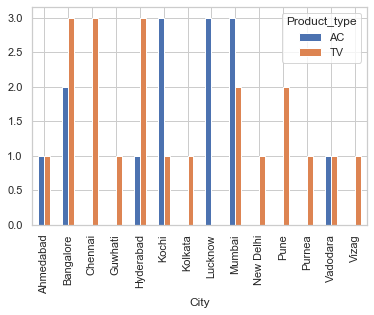

In [97]:
warrantyF.groupby('City').Product_type.value_counts().unstack().plot.bar()

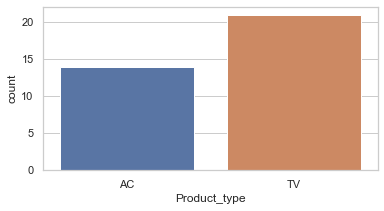

In [83]:
#TV more than AC
fig = plt.figure(figsize=(6,3))
sns.countplot(x='Product_type', data=warrantyF)

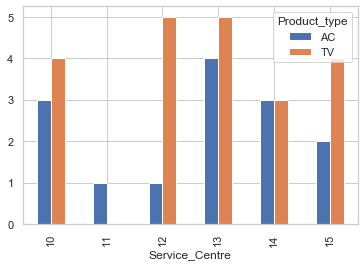

In [115]:
warrantyF.groupby('Service_Centre').Product_type.value_counts().unstack().plot.bar()

<Figure size 792x504 with 0 Axes>

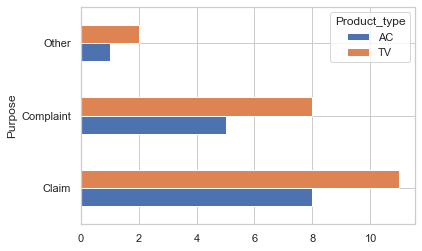

In [84]:
fig = plt.figure(figsize=(11,7))
warrantyF.groupby('Purpose').Product_type.value_counts().unstack().plot.barh()

In [265]:
warrantyF.groupby(by=[ "Fraud"])['Product_type'].value_counts()

Fraud  Product_type
1      TV              21
       AC              14
Name: Product_type, dtype: int64

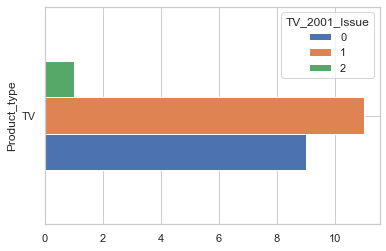

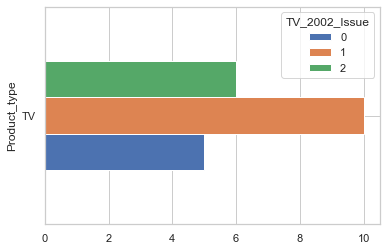

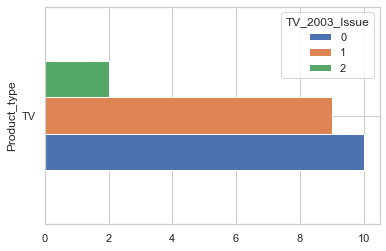

In [86]:
# 0 replace the component,
# 1 partial damage of the component 
# 2 no issue with the component
warrantyF =warrantyF[warrantyF['Product_type']=='TV']
warrantyF.groupby(by=[ "Product_type"])['TV_2001_Issue'].value_counts().unstack(1).plot.barh() # power supply 
warrantyF.groupby(by=[ "Product_type"])['TV_2002_Issue'].value_counts().unstack(1).plot.barh() # Inverter 
warrantyF.groupby(by=[ "Product_type"])['TV_2003_Issue'].value_counts().unstack(1).plot.barh() # Motherboard

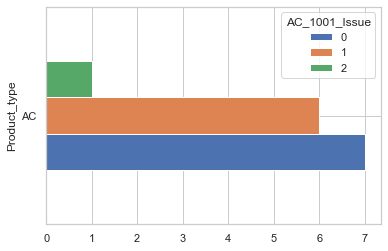

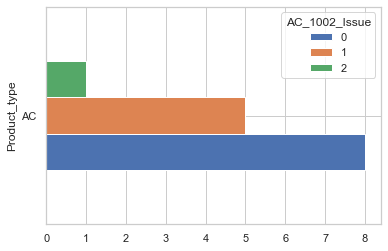

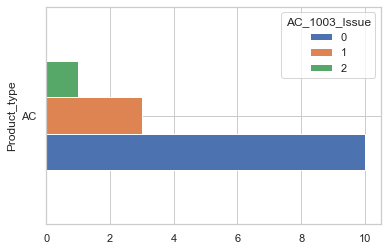

In [99]:
warrantyF =warrantyF[warrantyF['Product_type']=='AC']
warrantyF.groupby(by=[ "Product_type"])['AC_1001_Issue'].value_counts().unstack(1).plot.barh() # Compressor
warrantyF.groupby(by=[ "Product_type"])['AC_1002_Issue'].value_counts().unstack(1).plot.barh() # Condenser Coil   
warrantyF.groupby(by=[ "Product_type"])['AC_1003_Issue'].value_counts().unstack(1).plot.barh() # Evaporator Coil

Text(0.5, 1.0, 'Amount of Fraud warranty claims')

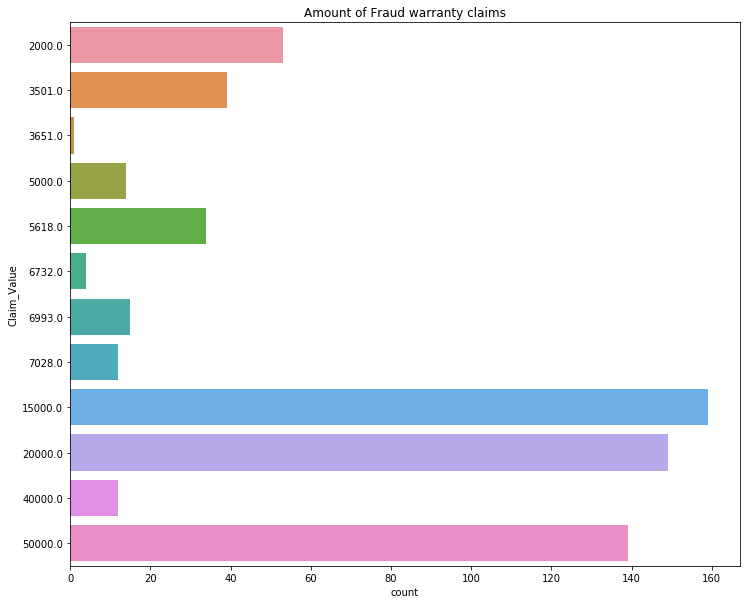

In [73]:
fig = plt.figure(figsize=(12,10))
sns.countplot(y="Claim_Value", data=warrantyF[warrantyF['Claim_Value']>0])
plt.title('Amount of Fraud warranty claims')

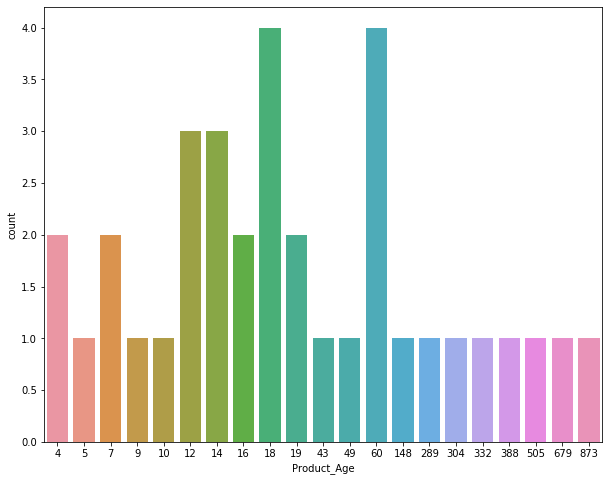

In [377]:
fig = plt.figure(figsize=(10,8))
sns.countplot(x='Product_Age', data=warrantyF.reset_index())

Text(0.5, 1.0, 'Source of the purchase ')

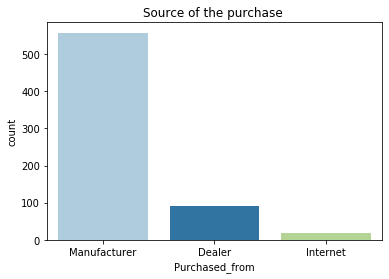

In [146]:
fig = plt.figure(figsize=(6,4))
sns.countplot(x='Purchased_from', data=warrantyF,palette='Paired')
plt.title('Source of the purchase ')

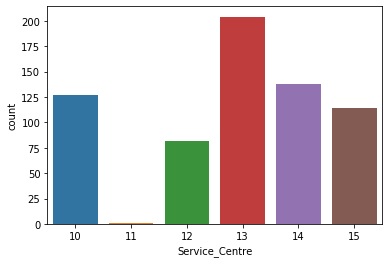

In [230]:
fig = plt.figure(figsize=(6,4))
sns.countplot(x='Service_Centre', data=warrantyF)

# Features engineering

# Transform numerical variables to categorica

In [155]:
from sklearn import preprocessing
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import StandardScaler # ss object
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [156]:
#Catigrica feauter 
warranty_cat = pd.DataFrame.copy(warranty)
columns = ['Product_Age','Call_details','Claim_Value']
for i in warranty_cat.columns:
    if i not in columns:
        warranty_cat[i] = warranty_cat[i].astype('category')

In [157]:
# test 
warranty_catT = pd.DataFrame.copy(test)
columns = ['Product_Age','Call_details','Claim_Value']
for i in warranty_catT.columns:
    if i not in columns:
        warranty_catT[i] = warranty_catT[i].astype('category')

# Label Encodin

In [158]:
W = pd.DataFrame.copy(warranty_cat)
for i in W.columns:
    if W[i].dtype.name =='category':
        enco = preprocessing.LabelEncoder()
        enco.fit(list(set(W[i])))
        W[i] = enco.transform(W[i])


In [159]:
WT = pd.DataFrame.copy(warranty_catT)
for i in WT.columns:
    if WT[i].dtype.name =='category':
        enco = preprocessing.LabelEncoder()
        enco.fit(list(set(WT[i])))
        WT[i] = enco.transform(WT[i])

Let's normalize feature ..

In [160]:
colum = []
for i in warranty_cat.columns:
    if warranty_cat[i].dtype.name == 'category':
        colum.append(i)
dum = pd.get_dummies(warranty_cat, columns =colum[:-1])
ss = preprocessing.MinMaxScaler()
Scaled = ss.fit_transform(dum[['Product_Age','Call_details','Claim_Value']] )
norm_dummy = np.concatenate((Scaled,dum.values[:,3:101]),axis=1)

In [161]:
colum = []
for i in warranty_catT.columns:
    if warranty_catT[i].dtype.name == 'category':
        colum.append(i)
dumT = pd.get_dummies(warranty_catT, columns =colum[:-1])
min_max_scaler = preprocessing.MinMaxScaler()
ScaledT = min_max_scaler.fit_transform(dumT[['Product_Age','Call_details','Claim_Value']] )
norm_dummyT = np.concatenate((ScaledT,dumT.values[:,3:97]),axis=1)

# Dummies!

In [162]:
norm_dum = pd.DataFrame(norm_dummy,columns=dum.columns)
norm_dum.head()


,Claim_Value,Product_Age,Call_details,Fraud,Region_East,Region_North,Region_North East,Region_North West,Region_South,Region_South East,...,Service_Centre_13,Service_Centre_14,Service_Centre_15,Service_Centre_16,Purchased_from_Dealer,Purchased_from_Internet,Purchased_from_Manufacturer,Purpose_Claim,Purpose_Complaint,Purpose_Other
0,0.201417,1,0.08948,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0.0576923,0.0271186,0.5,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,0,0.0677966,0.2,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0.677126,0.830508,0.08432,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,0,0.20339,0.4,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0


In [163]:
norm_dumF= norm_dum.astype(float)

In [164]:
norm_dumT = pd.DataFrame(norm_dummyT,columns=dumT.columns)

In [276]:
norm_dumF.corr()

,Claim_Value,Product_Age,Call_details,Fraud,Region_East,Region_North,Region_North East,Region_North West,Region_South,Region_South East,...,Service_Centre_13,Service_Centre_14,Service_Centre_15,Service_Centre_16,Purchased_from_Dealer,Purchased_from_Internet,Purchased_from_Manufacturer,Purpose_Claim,Purpose_Complaint,Purpose_Other
Claim_Value,1.000000,0.646072,-0.416981,-0.108500,0.017468,-0.021584,-0.086155,-0.113546,0.014366,0.090671,...,-0.034793,0.013734,-0.107482,-0.037387,0.022522,0.082665,-0.095267,0.047077,-0.092173,0.068205
Product_Age,0.646072,1.000000,-0.522797,-0.107172,-0.012955,0.005555,-0.080264,-0.081340,0.016769,0.031114,...,-0.010183,0.095349,-0.157956,-0.045935,0.016325,0.148894,-0.147148,0.053354,-0.130827,0.117877
Call_details,-0.416981,-0.522797,1.000000,0.237624,0.184782,-0.054658,0.000184,-0.015253,-0.071975,0.071988,...,0.160202,-0.114167,-0.038147,-0.000272,-0.114615,-0.230728,0.318095,0.088429,-0.069111,-0.031995
Fraud,-0.108500,-0.107172,0.237624,1.000000,0.099727,-0.040482,-0.005584,-0.094594,-0.027962,0.002288,...,0.069371,0.032384,-0.061829,-0.017525,-0.167584,-0.116841,0.271553,0.043187,-0.024110,-0.030467
Region_East,0.017468,-0.012955,0.184782,0.099727,1.000000,-0.110493,-0.144576,-0.099029,-0.192103,-0.139734,...,0.435617,-0.032486,-0.201075,-0.018347,-0.071550,-0.020703,0.090326,0.033764,-0.027356,-0.010726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Purchased_from_Internet,0.082665,0.148894,-0.230728,-0.116841,-0.020703,0.027682,-0.139493,0.090690,0.018382,-0.034230,...,-0.014998,0.123630,0.011630,-0.029494,-0.444767,1.000000,-0.429169,-0.173670,0.185633,-0.013971
Purchased_from_Manufacturer,-0.095267,-0.147148,0.318095,0.271553,0.090326,-0.066647,0.052190,-0.045775,0.008451,0.005352,...,0.067911,-0.123139,-0.008331,0.068725,-0.618089,-0.429169,1.000000,0.052182,-0.037479,-0.023963
Purpose_Claim,0.047077,0.053354,0.088429,0.043187,0.033764,0.101642,0.042513,-0.082699,-0.107446,0.034371,...,0.013494,-0.039157,-0.051466,-0.050740,0.099408,-0.173670,0.052182,1.000000,-0.792521,-0.344909
Purpose_Complaint,-0.092173,-0.130827,-0.069111,-0.024110,-0.027356,-0.087548,0.006632,0.021655,0.118309,-0.006009,...,-0.024869,0.017293,0.122895,0.064024,-0.124398,0.185633,-0.037479,-0.792521,1.000000,-0.299075


In [277]:
#corrmat = norm_dumF.corr()
#plt.subplots(figsize=(20,15))
#sns.heatmap(corrmat, vmax=0.9, square=True);

# Correlation Heatmap

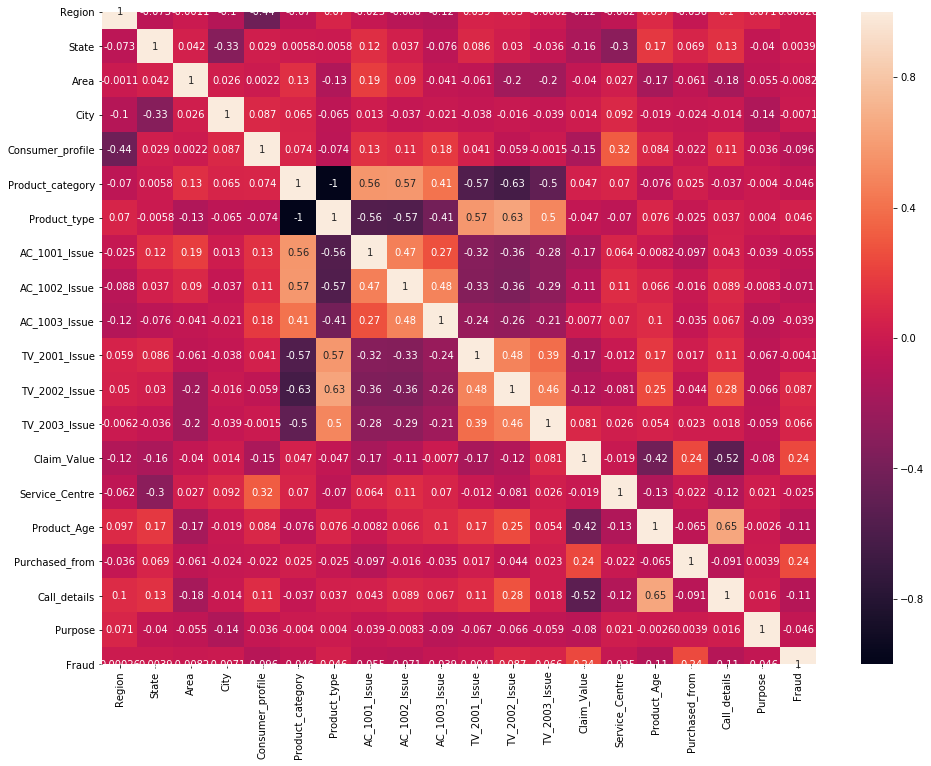

In [103]:
fig, ax = plt.subplots(figsize=(16,12))
sns.heatmap(W.corr(),ax = ax, annot=True )

In [217]:
#norm_dum[norm_dum.columns[1:50]].corr()['Fraud'][:]
#corr = norm_dum.corr()
#corr['Fraud'].sort_values(ascending = False)

# MODLING

In [165]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from ipywidgets import interact,interactive
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

In [166]:
X = norm_dum.drop('Fraud' , axis=True)
y=dum.Fraud
sm = SMOTE(random_state =101)
Xb, Yb = sm.fit_sample(X, y)
Xb.shape, Yb.shape

((642, 99), (642,))

In [186]:
y.value_counts()/y.shape

0    0.901685
1    0.098315
Name: Fraud, dtype: float64

In [168]:
X_train,X_test,Y_train,Y_test = train_test_split(Xb, Yb,test_size=0.3,random_state=0)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((449, 99), (193, 99), (449,), (193,))

In [236]:
# Transform your dataset with Robust Scalar to decrease the influence of the outliers
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
X_train_s = rs.fit_transform(X_train)
X_test_s = rs.transform(X_test)

In [241]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=50,  weights='distance')
KNN.fit(X_train_s, Y_train)
print("train:",KNN.score(X_train_s,Y_train))
knns = round(KNN.score(X_train_s, Y_train) * 100, 2)
print(knns)
print('Test:', KNN.score(X_test_s,Y_test))

train: 0.9844097995545658
98.44
Test: 0.8134715025906736


In [238]:
#grid search with KNN
#from sklearn.metrics import mean_squared_error
#from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
param = {"n_neighbors":[28,30,32 ,33,34,35,40],'weights':['distance']}
grid_knn = GridSearchCV(KNN, param, cv=5, n_jobs=-1)
grid_knn.fit(X_train_s, Y_train)

print("train:",grid_knn.score(X_train_s, Y_train))
gk = round(grid_knn.score(X_train_s, Y_train) * 100, 2)
print(gk)
print('Test:', grid_knn.score(X_test_s,Y_test))

train: 0.9844097995545658
98.44
Test: 0.8186528497409327


In [286]:
grid_knn.best_params_

{'n_neighbors': 33, 'weights': 'distance'}

In [242]:
#KNN with bagging
from sklearn.ensemble import BaggingClassifier
#knn = KNeighborsClassifier()
knn_en = BaggingClassifier(base_estimator=knn, oob_score=True)
knn_en.fit(X_train_s, Y_train)

print("train:",knn_en.score(X_train_s, Y_train))
ba = round(knn_en.score(X_train_s, Y_train) * 100, 2)
print(ba)
print('Test:', knn_en.score(X_test_s,Y_test))

C:\Users\LAM\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:633: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\LAM\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:638: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


train: 0.8841870824053452
88.42
Test: 0.8808290155440415


In [243]:
# RandomForest
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=2,criterion='entropy',max_depth=9,min_samples_leaf=3,max_features='auto',random_state=9)
forest.fit(X_train_s,Y_train)

print("train:",forest.score(X_train_s,Y_train))
rf = round(forest.score(X_train_s, Y_train) * 100, 2)
print(rf)
print('Test:', forest.score(X_test_s,Y_test))

train: 0.933184855233853
93.32
Test: 0.8393782383419689


In [244]:
# DT
Warrenty_Tree = DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_leaf=2,random_state=28,splitter='best')
Warrenty_Tree.fit(X_train_s,Y_train)
print("train:",Warrenty_Tree.score(X_train_s,Y_train))
DT = round(Warrenty_Tree.score(X_train_s, Y_train) * 100, 2)
print(DT)
print('Test:', Warrenty_Tree.score(X_test_s,Y_test))


train: 0.9621380846325167
96.21
Test: 0.8704663212435233


In [175]:
# SVC
from sklearn.svm import SVC, LinearSVC
svc = SVC()
svc.fit(X_train_s, Y_train)
print("train:",svc.score(X_train_s, Y_train))
svcs = round(svc.score(X_train_s, Y_train) * 100, 2)
print(svcs)
print('Test:', svc.score(X_test_s,Y_test))

train: 0.6391982182628062
63.92
Test: 0.538860103626943


In [176]:
# Logistic Regression ( Scaled)
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
scaler = StandardScaler()
X_trains = scaler.fit_transform(X_train_s)
X_tests = scaler.transform(X_test_s)
logreg.fit(X_trains, Y_train)
print("train:",logreg.score(X_trains,Y_train))
lo = round(logreg.score(X_trains, Y_train) * 100, 2)
print(lo)
print('Test:', logreg.score(X_tests,Y_test))

train: 0.9064587973273942
90.65
Test: 0.8393782383419689


In [250]:
#RF + grid search
parameters = { 'max_features':np.arange(5,10),'n_estimators':[100,200,500],'min_samples_leaf': [10]}

random_grid = GridSearchCV(forest, parameters, cv = 5)
random_grid.fit(X_train_s , Y_train)


print("train:",random_grid.score(X_train_s , Y_train))
rfg = round(random_grid.score(X_train_s , Y_train) * 100, 2)
print(rfg)
print('Test:', random_grid.score(X_test_s,Y_test))
random_grid.best_estimator_

train: 0.9242761692650334
92.43
Test: 0.8704663212435233


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=9, max_features=8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=9, verbose=0,
                       warm_start=False)

In [267]:
#RF + grid search
parameters = { 'max_features':np.arange(5,10),'n_estimators':[200,400,600],'min_samples_leaf': [10]}

random_grid = GridSearchCV(forest, parameters, cv = 5)
random_grid.fit(X_train_s , Y_train)


print("train:",random_grid.score(X_train_s , Y_train))
rfg = round(random_grid.score(X_train_s , Y_train) * 100, 2)
print(rfg)
print('Test:', random_grid.score(X_test_s,Y_test))
random_grid.best_estimator_

train: 0.9242761692650334
92.43
Test: 0.8704663212435233


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=9, max_features=8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=9, verbose=0,
                       warm_start=False)

In [271]:
pd.DataFrame(confusion_matrix(Y_test , logreg.predict(X_test_s) ), 
columns=pd.MultiIndex.from_tuples([('predictions', 'Not Fraud'), ('predictions', 'Fraud')])
            , index=pd.MultiIndex.from_tuples([('Actual', 'Not Fraud'), ('Actual', 'Fraud')]))


predictions      
                   Not Fraud Fraud
Actual Not Fraud          76     9
       Fraud              55    53

In [178]:
#SVM
# use linear kernal 
from sklearn import svm
svm = svm.SVC(kernel='linear')
svm.fit(X_train_s, Y_train)

print("train:",svm.score(X_train_s, Y_train))
svms = round(svm.score(X_train_s, Y_train) * 100, 2)
print(svms)
print('Test:', svm.score(X_test_s, Y_test) )

train: 0.9042316258351893
90.42
Test: 0.8393782383419689


In [231]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
model = keras.Sequential([keras.layers.Flatten(input_shape=(99,)),keras.layers.Dense(16, activation=tf.nn.relu),keras.layers.Dense(16, activation=tf.nn.relu),keras.layers.Dense(1, activation=tf.nn.sigmoid)])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss',patience=3)
model.fit(X_train_s, Y_train, epochs=50, batch_size=1,  callbacks = [early_stop])

test_loss, test_acc = model.evaluate(X_test_s, Y_test)
print('Test accuracy:', test_acc)

Train on 449 samples
Epoch 1/50
449/449 [==============================] - 5s 12ms/sample - loss: 0.6770 - accuracy: 0.6236
Epoch 2/50
449/449 [==============================] - 3s 7ms/sample - loss: 0.5452 - accuracy: 0.7439
Epoch 3/50
449/449 [==============================] - 3s 7ms/sample - loss: 0.4336 - accuracy: 0.8196
Epoch 4/50
449/449 [==============================] - 3s 7ms/sample - loss: 0.3754 - accuracy: 0.8530
Epoch 5/50
449/449 [==============================] - 3s 7ms/sample - loss: 0.3315 - accuracy: 0.8797
Epoch 6/50
449/449 [==============================] - 3s 7ms/sample - loss: 0.2851 - accuracy: 0.8886
Epoch 7/50
449/449 [==============================] - 3s 7ms/sample - loss: 0.2535 - accuracy: 0.9131
Epoch 8/50
449/449 [==============================] - 3s 7ms/sample - loss: 0.2481 - accuracy: 0.9087
Epoch 9/50
449/449 [==============================] - 3s 7ms/sample - loss: 0.2331 - accuracy: 0.9109
Epoch 10/50
449/449 [==============================] - 3s 7m

Epoch 27/50
449/449 [==============================] - 3s 7ms/sample - loss: 0.0977 - accuracy: 0.9644
Epoch 28/50
449/449 [==============================] - 3s 7ms/sample - loss: 0.1064 - accuracy: 0.9666
Epoch 29/50
449/449 [==============================] - 3s 7ms/sample - loss: 0.0976 - accuracy: 0.9644
Epoch 30/50
449/449 [==============================] - 3s 7ms/sample - loss: 0.1055 - accuracy: 0.9599
Epoch 31/50
449/449 [==============================] - 3s 7ms/sample - loss: 0.1065 - accuracy: 0.9666
Epoch 32/50
449/449 [==============================] - 3s 7ms/sample - loss: 0.0903 - accuracy: 0.9644
Epoch 33/50
449/449 [==============================] - 3s 7ms/sample - loss: 0.0986 - accuracy: 0.9644
Epoch 34/50
449/449 [==============================] - 3s 7ms/sample - loss: 0.1121 - accuracy: 0.9688
Epoch 35/50
449/449 [==============================] - 4s 8ms/sample - loss: 0.0991 - accuracy: 0.9555
Epoch 36/50
449/449 [==============================] - 4s 8ms/sample - lo

In [232]:
nn = round(test_acc * 100, 2)
nn

90.67

In [269]:
models = pd.DataFrame({
    'Model': ['KNN','KNNGridSearchCV', 'BaggingClassifier', 'RandomForestClassifier', 
              'RFGridSearchCV', 'DecisionTreeClassifier','LogisticRegression','SVC', 'svm','keras.Sequential'],
    'Train Score': [knns, gk, ba, rf , rfg, DT, lo , svcs ,svms , nn ]})
models.sort_values(by='Train Score', ascending=False)

,Model,Train Score
0,KNN,98.44
1,KNNGridSearchCV,98.44
5,DecisionTreeClassifier,96.21
3,RandomForestClassifier,93.32
4,RFGridSearchCV,92.43
9,keras.Sequential,90.67
6,LogisticRegression,90.65
8,svm,90.42
2,BaggingClassifier,88.42
7,SVC,63.92


# Test

In [408]:
wanted_test_columns = X_train.columns

In [411]:
predictions = pd.DataFrame(forest.predict(X_test),columns = ['pred'])

In [412]:
predictions.to_csv('predictions.csv', index=False)

In [251]:
pd.DataFrame(confusion_matrix(Y_test , random_grid.predict(X_test_s) ), 
columns=pd.MultiIndex.from_tuples([('predictions', 'Not Fraud'), ('predictions', 'Fraud')])
            , index=pd.MultiIndex.from_tuples([('Actual', 'Not Fraud'), ('Actual', 'Fraud')]))


predictions      
                   Not Fraud Fraud
Actual Not Fraud          77     8
       Fraud              17    91

In [272]:
pd.DataFrame(confusion_matrix(Y_test , svm.predict(X_test_s) ), 
columns=pd.MultiIndex.from_tuples([('predictions', 'Not Fraud'), ('predictions', 'Fraud')])
            , index=pd.MultiIndex.from_tuples([('Actual', 'Not Fraud'), ('Actual', 'Fraud')]))


predictions      
                   Not Fraud Fraud
Actual Not Fraud          70    15
       Fraud              16    92

In [233]:
pred = model.predict(X_test_s);pred=(pred > 0.5)

In [191]:
pd.DataFrame(confusion_matrix(Y_test , forest.predict(X_test_s) ), 
columns=pd.MultiIndex.from_tuples([('predictions', 'Not Fraud'), ('predictions', 'Fraud')])
            , index=pd.MultiIndex.from_tuples([('Actual', 'Not Fraud'), ('Actual', 'Fraud')]))

predictions      
                   Not Fraud Fraud
Actual Not Fraud          80     5
       Fraud              26    82

In [273]:
pd.DataFrame(confusion_matrix(Y_test , pred ), 
columns=pd.MultiIndex.from_tuples([('predictions', 'Not Fraud'), ('predictions', 'Fraud')])
            , index=pd.MultiIndex.from_tuples([('Actual', 'Not Fraud'), ('Actual', 'Fraud')]))

predictions      
                   Not Fraud Fraud
Actual Not Fraud          74    11
       Fraud               7   101

In [234]:
pd.DataFrame(confusion_matrix(Y_test , pred ), 
columns=pd.MultiIndex.from_tuples([('predictions', 'Not Fraud'), ('predictions', 'Fraud')])
            , index=pd.MultiIndex.from_tuples([('Actual', 'Not Fraud'), ('Actual', 'Fraud')]))

predictions      
                   Not Fraud Fraud
Actual Not Fraud          74    11
       Fraud               7   101

In [275]:
from sklearn.metrics import accuracy_score 
print ('Accuracy Score :',accuracy_score(Y_test , random_grid.predict(X_test_s)) )
print ('Report : ')
print( classification_report( Y_test , KNN.predict(X_test_s)))

Accuracy Score : 0.8704663212435233
Report : 
              precision    recall  f1-score   support

           0       0.83      0.73      0.77        85
           1       0.81      0.88      0.84       108

    accuracy                           0.81       193
   macro avg       0.82      0.80      0.81       193
weighted avg       0.81      0.81      0.81       193



In [276]:
print ('Accuracy Score :',accuracy_score(Y_test , grid_knn.predict(X_test_s)) )
print ('Report : ')
print( classification_report( Y_test , grid_knn.predict(X_test_s)))

Accuracy Score : 0.8186528497409327
Report : 
              precision    recall  f1-score   support

           0       0.90      0.66      0.76        85
           1       0.78      0.94      0.85       108

    accuracy                           0.82       193
   macro avg       0.84      0.80      0.81       193
weighted avg       0.83      0.82      0.81       193



In [277]:
print ('Accuracy Score :',accuracy_score(Y_test , Warrenty_Tree.predict(X_test_s)) )
print ('Report : ')
print( classification_report( Y_test , Warrenty_Tree.predict(X_test_s)))

Accuracy Score : 0.8704663212435233
Report : 
              precision    recall  f1-score   support

           0       0.82      0.91      0.86        85
           1       0.92      0.84      0.88       108

    accuracy                           0.87       193
   macro avg       0.87      0.87      0.87       193
weighted avg       0.88      0.87      0.87       193



In [278]:
print ('Accuracy Score :',accuracy_score(Y_test , forest.predict(X_test_s)) )
print ('Report : ')
print( classification_report( Y_test , forest.predict(X_test_s)))

Accuracy Score : 0.8393782383419689
Report : 
              precision    recall  f1-score   support

           0       0.75      0.94      0.84        85
           1       0.94      0.76      0.84       108

    accuracy                           0.84       193
   macro avg       0.85      0.85      0.84       193
weighted avg       0.86      0.84      0.84       193



In [281]:
pred = model.predict(X_test_s);pred=(pred > 0.5)
print ('Accuracy Score :',accuracy_score(Y_test ,  pred ))
print ('Report : ')
print( classification_report(list(Y_test),pred))

Accuracy Score : 0.9067357512953368
Report : 
              precision    recall  f1-score   support

           0       0.91      0.87      0.89        85
           1       0.90      0.94      0.92       108

    accuracy                           0.91       193
   macro avg       0.91      0.90      0.90       193
weighted avg       0.91      0.91      0.91       193



In [280]:
print ('Accuracy Score :',accuracy_score(Y_test , svm.predict(X_test_s)) )
print ('Report : ')
print( classification_report( Y_test , forest.predict(X_test_s)))

Accuracy Score : 0.8393782383419689
Report : 
              precision    recall  f1-score   support

           0       0.75      0.94      0.84        85
           1       0.94      0.76      0.84       108

    accuracy                           0.84       193
   macro avg       0.85      0.85      0.84       193
weighted avg       0.86      0.84      0.84       193

